In [94]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn 
from sklearn import metrics 
import numpy as np 
from numpy.linalg import svd, norm
from tqdm import tqdm 

In [3]:
M = 28 * 28
N = 28
K = 10

In [4]:
(train_x , train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x.reshape(-1, M), test_x.reshape(-1, M)

### Means Clustering

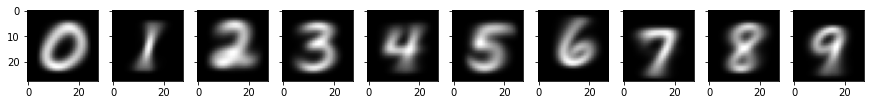

In [5]:
fig, ax = plt.subplots(1, 10, sharey=True)
fig.set_size_inches(15, 10)
means = np.zeros(shape=(10, M))
for i in range(10) : 
    t = train_x[train_y == i]
    means[i] = np.mean(t, axis=0)
    ax[i].imshow(means[i].reshape(N, N), cmap='gray')

In [112]:
pred = np.argmin(norm(means - test_x.reshape(-1, 1 , M), 2, axis=2), axis=1)
print( "accuracy: ", test_accuracy(pred) , "%" )

accuracy:  82.03 %


In [7]:
bases = np.zeros(shape=(10, M, M)) 
for i in range(10) :
    t = train_x[train_y == i].T
    u, _, _ = svd(t, full_matrices=False)
    bases[i] = u

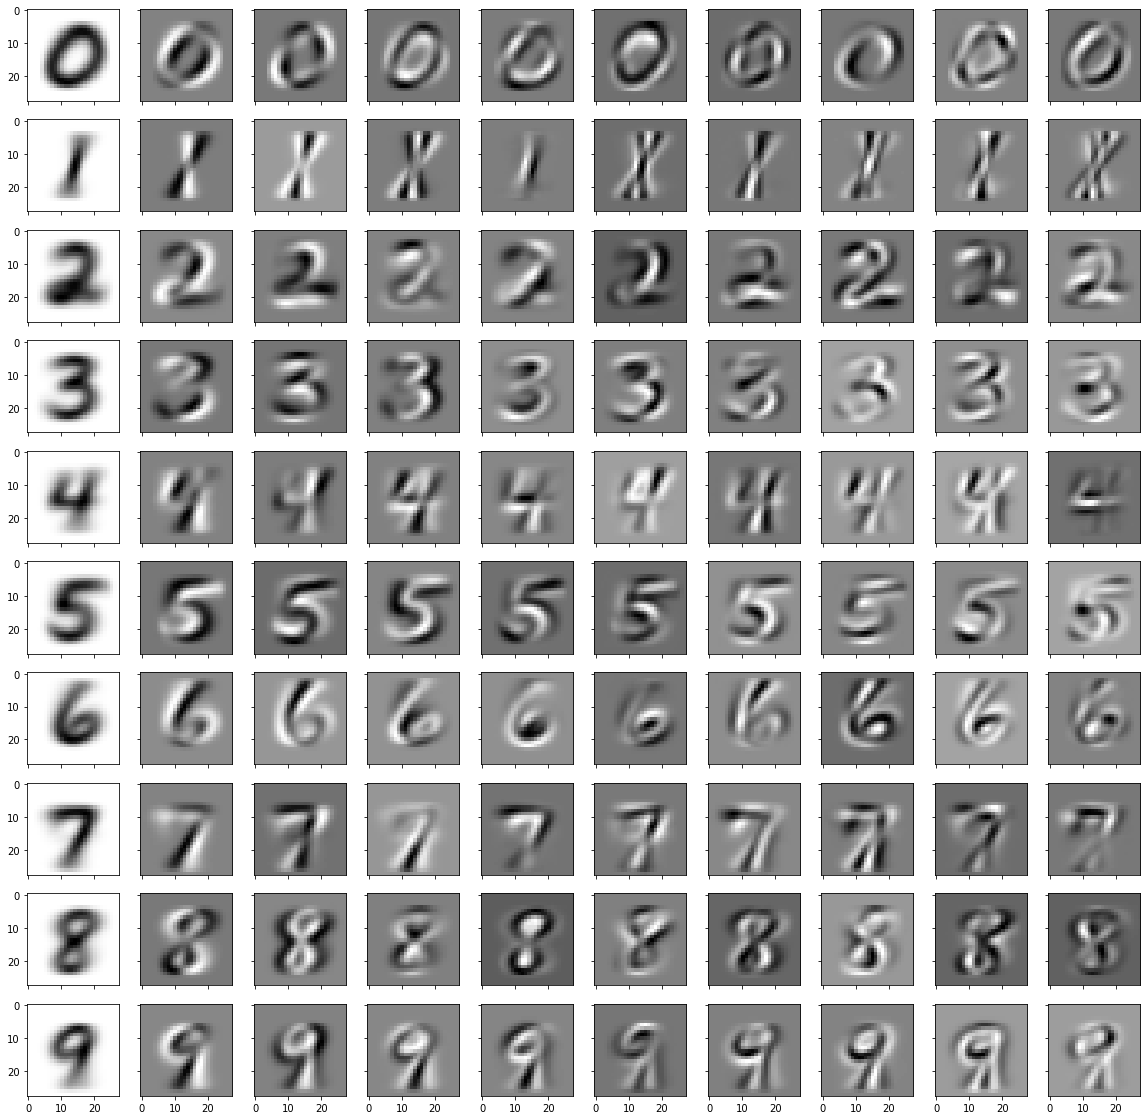

In [31]:
fig, ax = plt.subplots(10, 10, sharex=True, sharey=True)
fig.set_size_inches(20, 20)
for i in range(10) :
    for j in range(K) : 
        ax[i, j].imshow(bases[i][:, j].reshape(N, N), cmap='gray')

### Fig 10.6
below cell replicates figure 10.6 in the textbook. 

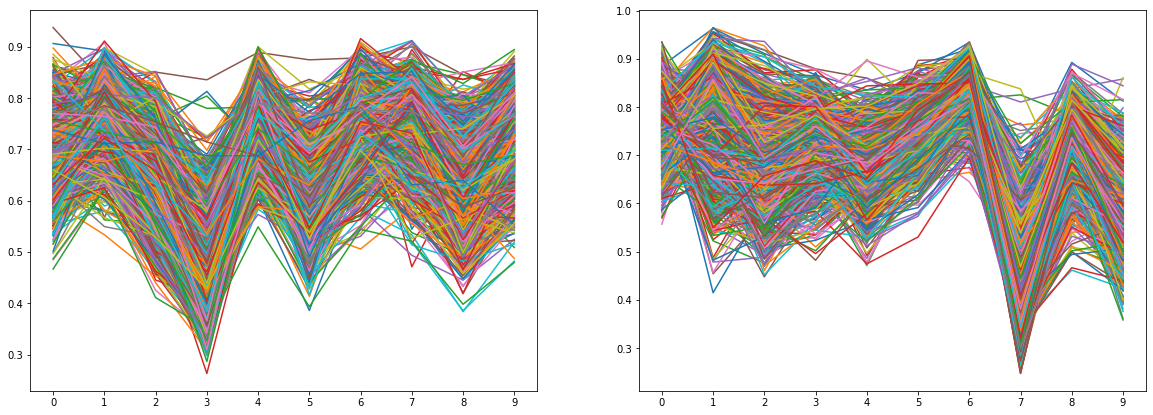

In [109]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 7)
for i, d in enumerate([3, 7]) : 
    res = residual(num_bases=10, digit=d)
    ax[i].plot(res.T)
    ax[i].set_xticks(np.arange(10));

In [117]:
history = []
for K in tqdm(range(1, 11)) :
    res = residual(num_bases=K)
    y = argmin(res, axis=1).reshape(-1)
    history += [test_accuracy(y)]

100%|██████████| 10/10 [10:58<00:00, 65.80s/it]


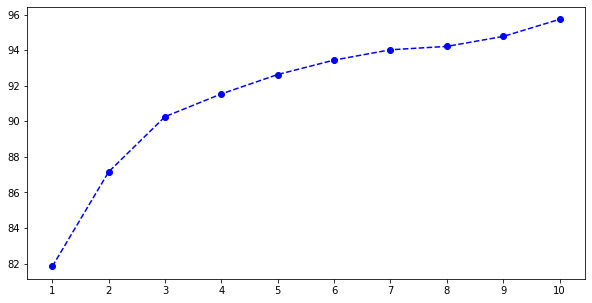

In [171]:
plt.xticks(np.arange(10), labels=np.arange(1,11))
plt.plot(history[:10], 'bo--');

In [142]:
for K in tqdm([20 , 30, 40, 50, 100]) :
    res = residual(num_bases=K)
    y = argmin(res, axis=1).reshape(-1)
    history += [test_accuracy(y)]

100%|██████████| 5/5 [04:10<00:00, 50.14s/it]


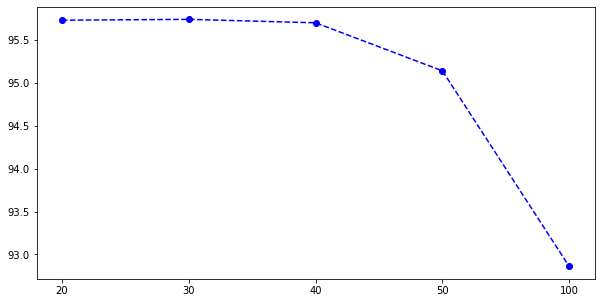

In [187]:
plt.xticks(np.arange(5), list(np.arange(20, 60, 10)) + [100])
plt.plot(history[-5:], 'bo--');

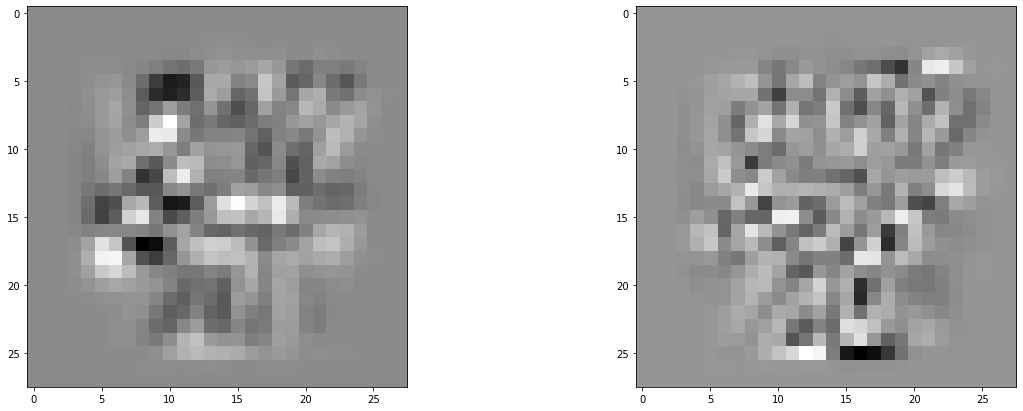

In [189]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20, 7)
for i, b in enumerate([50, 100]) :
    ax[i].imshow(bases[4][:, b].reshape(N, N), cmap="gray") ; 

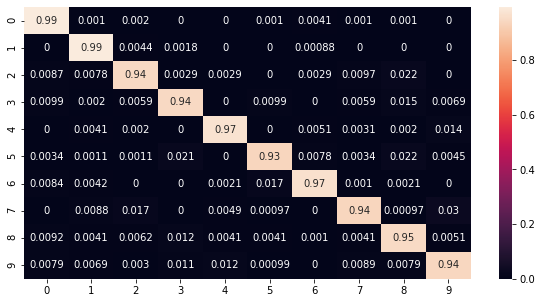

In [176]:
res = residual(num_bases=30)
y = argmin(res, axis=1).reshape(-1)
z = metrics.confusion_matrix(test_y, y, normalize='true')
seaborn.heatmap(z, annot=True)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

In [111]:
def test_accuracy(y) : 
    return np.sum(y == test_y) / len(test_y) * 100

In [108]:
 def residual(num_bases, digit=None) : 
    """
    get_residual returns residual given by :
                    min || z - u @ a || / ||z||
    where `z` is the target vector, `u` is the basis which is 
    used to estimate `z`, and `a` are multipliers. 
    ---------------
    parameters :
        num_bases : number of bases used to approximate m by n 
                    matrix A in SVD decomposition. 
        digit : use only digits equal to digit in test set if 
                specified, default None
    """
    u = bases[:, :, :num_bases]
    z = test_x if (digit == None) else test_x[test_y == digit] 
    z = z.reshape(-1, 1, M, 1)
    res = (np.eye(M) - u @ transpose(u, (0, 2, 1))) @ z
    res = norm(res, 2, axis=2) / norm(z, 2, axis=2)
    res = res.reshape(-1, 10)
    return res